In [16]:
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

In [2]:
dados = pd.read_csv("vgsales.csv")

In [3]:
#remove valores NaN
dados = dados.dropna()

In [4]:
#obtendo apenas variaveis desejadas
#desjamos prever a venda de um videogame na america do norte em função da plataforma, ano, genero e autora
dataset = dados.loc[:, ["Platform", "Year", "Genre" , "Publisher", "NA_Sales"]]

In [5]:
#escolhendo consoles para comparar
consoles = dataset["Platform"].value_counts()

In [6]:
#plataformas relevantes
relevantes = (dataset["Platform"] == "PS3") | (dataset["Platform"] == "Wii") |  (dataset["Platform"] == "X360")
dataset = dataset.loc[relevantes,:]

In [7]:
#Peganado top 10 publishers
top_10 = dataset["Publisher"].value_counts().head(10)
top_10_dict = top_10.to_dict()
chav = top_10_dict.keys()


keys = []


for i in chav:
    keys.append(i)
top_10

Electronic Arts                 395
Activision                      350
Ubisoft                         285
Namco Bandai Games              214
THQ                             185
Konami Digital Entertainment    162
Take-Two Interactive            161
Sega                            148
Sony Computer Entertainment     128
Capcom                           95
Name: Publisher, dtype: int64

In [8]:
#filtrando publishers
filtro = (dataset["Publisher"] == keys[0]) | (dataset["Publisher"] == keys[1]) | \
(dataset["Publisher"] == keys[2]) | (dataset["Publisher"] == keys[3]) | (dataset["Publisher"] == keys[4])\
| (dataset["Publisher"] == keys[5]) | (dataset["Publisher"] == keys[6]) | (dataset["Publisher"] == keys[7])\
| (dataset["Publisher"] == keys[8]) | (dataset["Publisher"] == keys[9])

game = dataset.loc[filtro,:]
game

,Platform,Year,Genre,Publisher,NA_Sales
16,PS3,2013.0,Action,Take-Two Interactive,7.01
23,X360,2013.0,Action,Take-Two Interactive,9.63
29,X360,2011.0,Shooter,Activision,9.03
31,X360,2010.0,Shooter,Activision,9.67
34,PS3,2012.0,Shooter,Activision,4.99
...,...,...,...,...,...
16413,X360,2006.0,Action,Electronic Arts,0.00
16437,Wii,2010.0,Sports,Konami Digital Entertainment,0.01
16482,X360,2012.0,Fighting,Namco Bandai Games,0.01
16517,Wii,2007.0,Action,Konami Digital Entertainment,0.00


In [9]:
#DataSet com Dummies
gamed = pd.get_dummies(game, columns = ["Platform", "Genre", "Publisher"])
gamed

,Year,NA_Sales,Platform_PS3,Platform_Wii,Platform_X360,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,...,Publisher_Activision,Publisher_Capcom,Publisher_Electronic Arts,Publisher_Konami Digital Entertainment,Publisher_Namco Bandai Games,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Ubisoft
16,2013.0,7.01,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23,2013.0,9.63,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29,2011.0,9.03,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
31,2010.0,9.67,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
34,2012.0,4.99,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16413,2006.0,0.00,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16437,2010.0,0.01,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16482,2012.0,0.01,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
16517,2007.0,0.00,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [10]:
PS3 = gamed["Platform_PS3"] == 1
Wii = gamed["Platform_Wii"] == 1
X360 = gamed["Platform_X360"] == 1

PS3 = gamed.loc[PS3,:]
Wii = gamed.loc[Wii,:]
X360 = gamed.loc[X360,:]
PS3

,Year,NA_Sales,Platform_PS3,Platform_Wii,Platform_X360,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,...,Publisher_Activision,Publisher_Capcom,Publisher_Electronic Arts,Publisher_Konami Digital Entertainment,Publisher_Namco Bandai Games,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Ubisoft
16,2013.0,7.01,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2012.0,4.99,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
37,2011.0,5.54,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
40,2010.0,5.98,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
54,2010.0,2.96,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16181,2011.0,0.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
16188,2009.0,0.00,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
16215,2014.0,0.00,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16250,2014.0,0.00,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [11]:
total_sales = gamed["NA_Sales"]
Wii_sales = Wii["NA_Sales"]
PS3_sales = PS3["NA_Sales"]
X360_sales = X360["NA_Sales"]

In [12]:
print("total sales")
print(total_sales.describe())
print()
print("PS3")
print(PS3_sales.describe())
print()
print("XBOX")
print(X360_sales.describe())
print()
print("Wii")
print(Wii_sales.describe())

total sales
count    2123.000000
mean        0.424004
std         0.784444
min         0.000000
25%         0.090000
50%         0.190000
75%         0.460000
max         9.670000
Name: NA_Sales, dtype: float64

PS3
count    826.000000
mean       0.376477
std        0.676551
min        0.000000
25%        0.050000
50%        0.160000
75%        0.420000
max        7.010000
Name: NA_Sales, dtype: float64

XBOX
count    701.000000
mean       0.550713
std        1.027862
min        0.000000
25%        0.110000
50%        0.240000
75%        0.570000
max        9.670000
Name: NA_Sales, dtype: float64

Wii
count    596.000000
mean       0.340839
std        0.536661
min        0.000000
25%        0.100000
50%        0.190000
75%        0.410000
max        6.050000
Name: NA_Sales, dtype: float64


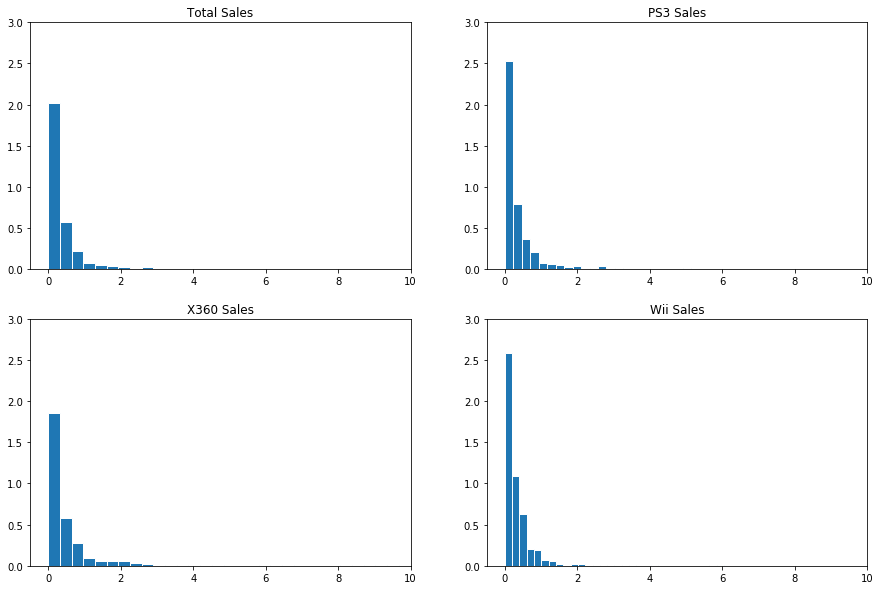

In [13]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(total_sales, bins = 30, density = True, edgecolor = "white");
plt.title("Total Sales");
plt.xlim(-0.5, 10)
plt.ylim(0,3);

plt.subplot(2,2,2)
plt.hist(PS3_sales, bins = 30, density = True, edgecolor = "white");
plt.title("PS3 Sales");
plt.xlim(-0.5, 10)
plt.ylim(0,3);

plt.subplot(2,2,3)
plt.hist(X360_sales, bins = 30, density = True, edgecolor = "white");
plt.title("X360 Sales");
plt.xlim(-0.5, 10)
plt.ylim(0,3);

plt.subplot(2,2,4)
plt.hist(Wii_sales, bins = 30, density = True, edgecolor = "white");
plt.title("Wii Sales");
plt.xlim(-0.5, 10);
plt.ylim(0,3);

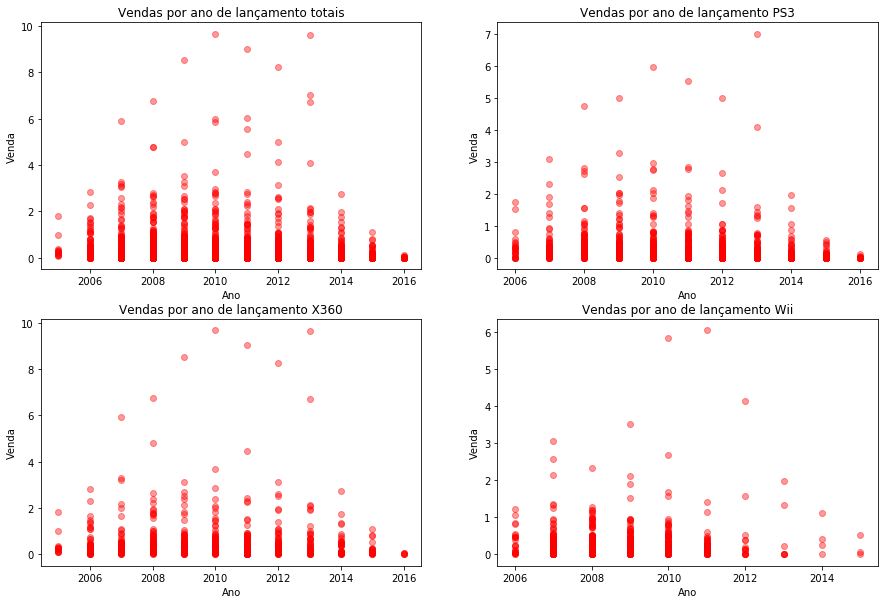

In [14]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.scatter(gamed["Year"], gamed["NA_Sales"], c="red", alpha = 0.4);
plt.title('Vendas por ano de lançamento totais');
plt.ylabel('Venda');
plt.xlabel('Ano');

plt.subplot(2,2,2)
plt.scatter(PS3["Year"],PS3["NA_Sales"], c="red", alpha = 0.4);
plt.title('Vendas por ano de lançamento PS3');
plt.ylabel('Venda');
plt.xlabel('Ano');

plt.subplot(2,2,3)
plt.scatter(X360["Year"],X360["NA_Sales"], c="red", alpha = 0.4);
plt.title('Vendas por ano de lançamento X360');
plt.ylabel('Venda');
plt.xlabel('Ano');

plt.subplot(2,2,4)
plt.scatter(Wii["Year"],Wii["NA_Sales"], c="red", alpha = 0.4);
plt.title('Vendas por ano de lançamento Wii');
plt.ylabel('Venda');
plt.xlabel('Ano');



In [15]:
game.groupby(by = "Publisher")["NA_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Publisher,,,,,,,,
Activision,350.0,0.577200,1.269694,0.00,0.1100,0.21,0.4600,9.67
Capcom,95.0,0.295474,0.462026,0.00,0.0000,0.11,0.3950,2.11
Electronic Arts,395.0,0.534329,0.551222,0.00,0.1800,0.37,0.6950,4.46
Konami Digital Entertainment,162.0,0.150185,0.269339,0.00,0.0200,0.09,0.1500,2.63
Namco Bandai Games,214.0,0.112290,0.189533,0.00,0.0000,0.00,0.1500,1.20
Sega,148.0,0.272770,0.377294,0.00,0.0775,0.14,0.3225,2.58
Sony Computer Entertainment,128.0,0.504219,0.708940,0.00,0.0000,0.22,0.6600,3.27
THQ,185.0,0.319027,0.303193,0.00,0.1200,0.22,0.4500,1.94
Take-Two Interactive,161.0,0.705652,1.231370,0.03,0.1400,0.28,0.7500,9.63


In [ ]:
#FUNCAO REGRESS
